In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv("/content/sample_data/Google_Stock_Price_Train.csv")

In [ ]:
xtrain=train[["Open","Close"]]

In [ ]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   Close   1258 non-null   object 
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [ ]:
xtrain["Close"]=xtrain["Close"].apply(lambda x: float(x.replace(",","")))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   Close   1258 non-null   float64
dtypes: float64(2)
memory usage: 19.8 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
sc_xtrain=ms.fit_transform(xtrain)

In [ ]:
out_col=sc_xtrain[:,0]+sc_xtrain[:,1]

In [ ]:
data=np.hstack((sc_xtrain[:,0].reshape(-1,1),sc_xtrain[:,1].reshape(-1,1),out_col.reshape(-1,1)))

In [ ]:
data

array([[0.08581368, 0.23757287, 0.32338654],
       [0.09701243, 0.24151427, 0.3385267 ],
       [0.09433366, 0.22878051, 0.32311416],
       ...,
       [0.95725128, 0.40495845, 1.36220973],
       [0.93796041, 0.40184391, 1.33980433],
       [0.93688146, 0.38672602, 1.32360748]])

In [ ]:
def timeseriesTransform(n_steps,data):
  x=[]
  y=[]
  for i in range(n_steps,len(data)+1):
    x.append(data[i-n_steps:i,:-1])
    y.append(data[i-1,-1])
  return np.array(x),np.array(y)

In [ ]:
n_steps=12
x_train,y_train=timeseriesTransform(n_steps,data)

In [ ]:
x_train.shape

(1247, 12, 2)

In [ ]:
from keras.layers import Dense,LSTM
from keras.models import Sequential
model=Sequential()
model.add(LSTM(200,activation='relu',input_shape=(n_steps,x_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
history=model.fit(x_train,y_train,epochs=100,batch_size=30)

Epoch 1/100
42/42 [==============================] - 23s 25ms/step - loss: 0.3015
Epoch 2/100
42/42 [==============================] - 1s 24ms/step - loss: 0.0092
Epoch 3/100
42/42 [==============================] - 1s 24ms/step - loss: 0.0047
Epoch 4/100
42/42 [==============================] - 1s 23ms/step - loss: 0.0032
Epoch 5/100
42/42 [==============================] - 1s 24ms/step - loss: 0.0036
Epoch 6/100
42/42 [==============================] - 1s 23ms/step - loss: 0.0027
Epoch 7/100
42/42 [==============================] - 1s 23ms/step - loss: 0.0030
Epoch 8/100
42/42 [==============================] - 1s 23ms/step - loss: 0.0033
Epoch 9/100
42/42 [==============================] - 1s 23ms/step - loss: 0.0025
Epoch 10/100
42/42 [==============================] - 1s 23ms/step - loss: 0.0025
Epoch 11/100
42/42 [==============================] - 1s 23ms/step - loss: 0.0020
Epoch 12/100
42/42 [==============================] - 1s 23ms/step - loss: 0.0031
Epoch 13/100
42/42 [====

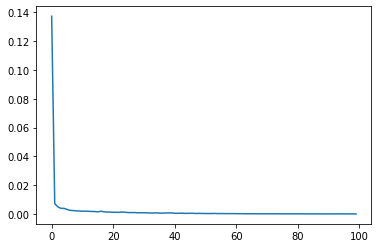

In [ ]:
plt.plot(history.history["loss"])

In [ ]:
test=pd.read_csv("/content/sample_data/Google_Stock_Price_Test.csv")

In [ ]:
xtest=test[["Open","Close"]]
xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   Close   20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [ ]:
sc_test=ms.fit_transform(xtest)

In [ ]:
test_out=sc_test[:,0]+sc_test[:,1]

In [ ]:
test_data=np.hstack((sc_test[:,0].reshape(-1,1),sc_test[:,1].reshape(-1,1),test_out.reshape(-1,1)))


array([[0.        , 0.        , 0.        ],
       [0.16186441, 0.01534424, 0.17720864],
       [0.12322034, 0.1590955 , 0.28231584],
       [0.27881356, 0.40399758, 0.68281114],
       [0.46762712, 0.41409247, 0.88171959],
       [0.49237288, 0.37653947, 0.86891235],
       [0.44389831, 0.4395316 , 0.8834299 ],
       [0.48016949, 0.40823743, 0.88840692],
       [0.4859322 , 0.4389259 , 0.92485811],
       [0.47915254, 0.37290531, 0.85205785],
       [0.45762712, 0.40238239, 0.86000951],
       [0.4459322 , 0.32364224, 0.76957444],
       [0.47627119, 0.38118312, 0.85745431],
       [0.4820339 , 0.66969513, 1.15172903],
       [0.73711864, 0.76176055, 1.49887919],
       [0.86118644, 1.        , 1.86118644],
       [1.        , 0.92893196, 1.92893196],
       [0.94745763, 0.75045427, 1.6979119 ],
       [0.60762712, 0.3266707 , 0.93429782],
       [0.3059322 , 0.2150212 , 0.5209534 ]])

In [ ]:
n_steps=12
x_test,y_test=timeseriesTransform(n_steps,data)

In [ ]:
ypred=model.predict(x_test)

array([[0.27680405],
       [0.15640461],
       [0.15157131],
       ...,
       [1.36220973],
       [1.33980433],
       [1.32360748]])

In [ ]:
#For converting the scaled data to original Data we have to stack the two values
Final=np.hstack((ypred,y_test.reshape(-1,1)))
Final

array([[0.2690849 , 0.27680405],
       [0.19366288, 0.15640461],
       [0.15896943, 0.15157131],
       ...,
       [1.35703874, 1.36220973],
       [1.33911788, 1.33980433],
       [1.31911695, 1.32360748]])

In [ ]:
output=ms.inverse_transform(Final)  # Getting Original Values
output

array([[794.68600914, 799.85010436],
       [790.23611003, 793.88672009],
       [788.18919649, 793.64732713],
       ...,
       [858.87528544, 853.6102481 ],
       [857.81795519, 852.5005084 ],
       [856.63790005, 851.69827857]])

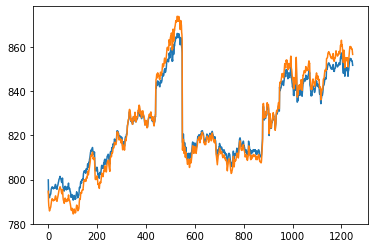

In [ ]:
actual=output[:,1]
predicted=output[:,0]
plt.plot(actual)
plt.plot(predicted)

In [36]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(actual,predicted)
print("MSE is ",mse)
rmse=np.sqrt(mse)
print("RMSE is ",rmse)

MSE is  12.732039692953276
RMSE is  3.568198381950375
